<a href="https://colab.research.google.com/github/ItsSHALINISuresh/ML-in-Business/blob/main/MIS710%20Assignment/MIS710_A1_Template_T2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** SHALINI SURESH

**Student ID:** S223019007

<a id = "cell_executivesummary"></a>
# 1. Business understandings, problem, solution and recommendations

#### NOTE: all the instructions and hints given in this template should be removed from your final submission. (Including this line)

**Aim:** To clearly articulate your understanding of the bussiness problem to management.

_Use this section to briefly include the business understandings and the business problem to address, the aim of this project and recommendations for VicCrashAnalytics.

<a id = "cell_exploration"></a>
# 2. Data understanding, preparation, explorations and visualisation

#### NOTE: You can create multiple Markdown and Code cells to present your work.

**Aim:** To demonstrate your understanding of data and report any insights emerging from data analysis

This section can be used for:
* Preparing (cleansing) for further processing.
* Finding meaningful patterns in the data set as relevant to the case study and the problem.
* Visualising variables related to the problem.

This section may include:
* Selection of relevant data features.
* Selection of an attribute as label.
* Approach to handling missing values (if any).
* Transformations on the dataset (can be any necessary modifications to the data - string value or categorial variables to numerical, any numeric normalizations, or any type conversions such as nominal to numeric and the similar).
* Univariate/Bivariate/Multivariate analyses (e.g., using visualizations etc.).

Make sure your visualizations are accompanied by relevant discussions of the insights the analyses and visualizations will/should lead to.

## 2.1 Import the Libraries


In [290]:
# Load libraries for data manipulation,analysis and for calculation with arrays
import pandas as pd
import numpy as np

#Load libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns



## 2.2 Load the dataset

In [291]:
# Load data using github
url = 'https://raw.githubusercontent.com/ItsSHALINISuresh/ML-in-Business/main/MIS710%20Assignment/Blackspot.csv'

# Load data
df = pd.read_csv(url)

#explore the dataset
print(df)

print('Sample size:', df.shape[0])
print('Number of columns:', df.shape[1])

        ID               EZI_ROAD_NAME              ROAD_NAME ROAD_TYPE  \
0     3699                  GROVE ROAD                  GROVE      ROAD   
1      576          BACCHUS MARSH ROAD          BACCHUS MARSH      ROAD   
2      758                GRUBBED ROAD                GRUBBED      ROAD   
3       89                VIGOR STREET                  VIGOR    STREET   
4     8773                FAIRMAN ROAD                FAIRMAN      ROAD   
...    ...                         ...                    ...       ...   
5321   256  WARBURTON-WOODS POINT ROAD  WARBURTON-WOODS POINT      ROAD   
5322  5182             GLENELG HIGHWAY                GLENELG   HIGHWAY   
5323  4196          CAPE PATERSON ROAD          CAPE PATERSON      ROAD   
5324  4352                MCPHANS ROAD                MCPHANS      ROAD   
5325   223                 ROGERS ROAD                 ROGERS      ROAD   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
0                     0.121

In [292]:
# Prints data type of all the columns
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5317 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

## 2.3 Handling Missing data

In [293]:
# Inspecting missing data
print(df.isnull().sum().sort_values(ascending=0))

AGE_65YRS_OVER_PCNT                9
Lq_Licenses                        6
Primary_Production%                0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
ID                                 0
DWELLING_FLAT_UNIT_APART_PCNT      0
Intersection                       0
Supermarket                        0
primary_school                     0
secondary_school                   0
km_post                            0
traffic_signal                     0
OCCUPATION_WHITE_COLLAR_PCNT       0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
EZI_ROAD_NAME                      0
AGE_18YRS_OVER_PCNT                0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
S

###2.3.1 Univariate Analysis

In [294]:
#overview of numeric data
df.describe()

,ID,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,SEO_PERSONS_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,...,Industrial%,Residential%,Parkland%,Primary_Production%,Lq_Licenses,Supermarket,primary_school,secondary_school,km_post,traffic_signal
count,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5317.000000,5326.000000,5326.000000,5326.000000,...,5326.000000,5326.000000,5326.000000,5326.000000,5320.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000
mean,4996.381149,0.175456,0.099507,0.202988,0.306965,0.774056,0.202530,0.884964,0.443514,0.401426,...,0.009862,0.393237,0.137413,0.375253,0.378008,0.012580,0.025535,0.004506,0.127488,0.022343
std,2885.736141,0.050574,0.030945,0.054621,0.067690,0.102008,0.105217,0.107473,0.105680,0.114858,...,0.070263,0.413405,0.277777,0.431760,1.550966,0.111462,0.157758,0.066983,0.333550,0.147811
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2477.000000,0.144847,0.079897,0.172337,0.274064,0.751515,0.149367,0.870588,0.387283,0.342105,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5020.500000,0.177419,0.102041,0.197248,0.317073,0.778723,0.181102,0.896985,0.450000,0.406977,...,0.000000,0.226550,0.000000,0.081297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7478.750000,0.205817,0.123007,0.234266,0.348189,0.816156,0.237288,0.927536,0.500000,0.477124,...,0.000000,0.832911,0.114782,0.962690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9999.000000,0.329241,0.198113,0.608696,0.490798,1.000000,1.000000,1.000000,1.088235,0.785714,...,1.000000,1.000000,1.000000,1.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [295]:
#Fill in missing numerical data with mean and categorical data with mode
df['AGE_65YRS_OVER_PCNT'].fillna(df['AGE_65YRS_OVER_PCNT'].mean(),inplace=True)
df['Lq_Licenses'].fillna(df['Lq_Licenses'].mean(),inplace=True)

In [296]:
# verifying about the missings data
print(df.isnull().sum().sort_values(ascending=0))

ID                                 0
EZI_ROAD_NAME                      0
OCCUPATION_WHITE_COLLAR_PCNT       0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
Primary_Production%                0
Lq_Licenses                        0
Intersection                       0
Supermarket                        0
primary_school                     0
secondary_school                   0
km_post                            0
traffic_signal                     0
DWELLING_FLAT_UNIT_APART_PCNT      0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
DWELLING_SEP_HOUSE_PCNT            0
AGE_18YRS_OVER_PCNT                0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
A

### 2.3.2 Drop column

In [297]:
#Remove ID from the dataset
df = df.drop(['ID'], axis = 1)

print(df)

                   EZI_ROAD_NAME              ROAD_NAME ROAD_TYPE  \
0                     GROVE ROAD                  GROVE      ROAD   
1             BACCHUS MARSH ROAD          BACCHUS MARSH      ROAD   
2                   GRUBBED ROAD                GRUBBED      ROAD   
3                   VIGOR STREET                  VIGOR    STREET   
4                   FAIRMAN ROAD                FAIRMAN      ROAD   
...                          ...                    ...       ...   
5321  WARBURTON-WOODS POINT ROAD  WARBURTON-WOODS POINT      ROAD   
5322             GLENELG HIGHWAY                GLENELG   HIGHWAY   
5323          CAPE PATERSON ROAD          CAPE PATERSON      ROAD   
5324                MCPHANS ROAD                MCPHANS      ROAD   
5325                 ROGERS ROAD                 ROGERS      ROAD   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
0                     0.121988           0.058735           0.228916   
1                     0.215

##2.4 Converting catogorical variable into numerical data

In [298]:
#Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [299]:
#convert categorical variables to numeric
# Define the custom mapping
ROAD_TYPE_mapping = {
    'FREEWAY':5,
    'WAY':4,
    'HIGHWAY':3,
    'DRIVE': 2,
    'ROAD': 1,
    'STREET': 0
}
df['ROAD_TYPE'] = df['ROAD_TYPE'].replace(ROAD_TYPE_mapping)

In [300]:
# Convert the categories to numerical values using replace()
Intersection_mapping = {
    'Intersection': 1,
    'non-Intersection': 0
}
df['Intersection'] = df['Intersection'].replace(Intersection_mapping)

In [301]:
# Convert the categories to numerical values using replace()
Blackspot_mapping = {
    'Blackspot': 1,
    'non-Blackspot': 0
}
df['Blackspot'] = df['Blackspot'].replace(Blackspot_mapping)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EZI_ROAD_NAME                    5326 non-null   object 
 1   ROAD_NAME                        5326 non-null   object 
 2   ROAD_TYPE                        5326 non-null   int64  
 3   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 4   AGE_15_24YRS_PCNT                5326 non-null   float64
 5   AGE_25_44YRS_PCNT                5326 non-null   float64
 6   AGE_45_64YRS_PCNT                5326 non-null   float64
 7   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 8   AGE_65YRS_OVER_PCNT              5326 non-null   float64
 9   SEO_PERSONS_PCNT                 5326 non-null   float64
 10  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 11  FC_COUPLE_WITH_CHILDREN_PCNT     5326 non-null   float64
 12  FC_SINGLE_PARENT    

In [303]:
# To Check if our categorical variables are converted to numerical variables
df.head(10)

,EZI_ROAD_NAME,ROAD_NAME,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,SEO_PERSONS_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
0,GROVE ROAD,GROVE,1,0.121988,0.058735,0.228916,0.269578,0.853916,0.320783,0.769466,...,0.358321,0.000000,14.0,0,0,0,0,0,0,1
1,BACCHUS MARSH ROAD,BACCHUS MARSH,1,0.215894,0.141722,0.312583,0.201325,0.741722,0.128477,0.797941,...,0.000000,1.000000,0.0,1,0,0,0,1,0,1
2,GRUBBED ROAD,GRUBBED,1,0.185304,0.102236,0.194888,0.348243,0.757188,0.169329,0.950311,...,1.000000,0.000000,0.0,0,0,0,0,0,0,0
3,VIGOR STREET,VIGOR,0,0.167763,0.062500,0.286184,0.322368,0.815789,0.161184,0.818792,...,0.036599,0.000000,0.0,0,0,0,0,0,0,0
4,FAIRMAN ROAD,FAIRMAN,1,0.201238,0.108359,0.204334,0.340557,0.761610,0.145511,0.852201,...,0.000000,1.000000,0.0,0,0,0,0,0,0,0
5,MOE-RAWSON ROAD,MOE-RAWSON,1,0.144578,0.072289,0.162651,0.403614,0.828313,0.216867,0.855385,...,0.265925,0.734075,0.0,0,0,0,0,1,0,0
6,ANDERSON STREET,ANDERSON,0,0.210619,0.093805,0.277876,0.276106,0.755752,0.141593,0.953571,...,0.111573,0.000000,0.0,0,0,0,0,0,0,0
7,BENNETT STREET,BENNETT,0,0.143345,0.095563,0.208191,0.303754,0.829352,0.249147,0.863014,...,0.000000,0.000000,0.0,1,0,0,0,0,0,1
8,PIER ROAD,PIER,1,0.150000,0.057143,0.200000,0.297619,0.823810,0.295238,0.898104,...,0.000000,0.000000,0.0,0,0,0,0,0,0,0
9,GORDON STREET,GORDON,0,0.219336,0.096681,0.222222,0.259740,0.735931,0.202020,0.891176,...,0.000000,0.000000,1.0,1,0,0,0,0,0,1


##2.5 Variable Analysis


Stats and visualtion

1.Univariate analysis

2.Bivariate analysis

3.Multivariate analysis

###2.5.1 Univariate Analysis

In [304]:
#overview of numeric data
df.describe()

,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,SEO_PERSONS_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
count,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,...,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000
mean,0.955314,0.175456,0.099507,0.202988,0.306965,0.774056,0.202530,0.884964,0.443514,0.401426,...,0.137413,0.375253,0.378008,0.125235,0.012580,0.025535,0.004506,0.127488,0.022343,0.106459
std,0.847129,0.050574,0.030945,0.054621,0.067690,0.102008,0.105128,0.107473,0.105680,0.114858,...,0.277777,0.431760,1.550092,0.331016,0.111462,0.157758,0.066983,0.333550,0.147811,0.308453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.144847,0.079897,0.172337,0.274064,0.751515,0.149367,0.870588,0.387283,0.342105,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.177419,0.102041,0.197248,0.317073,0.778723,0.181102,0.896985,0.450000,0.406977,...,0.000000,0.081297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.205817,0.123007,0.234266,0.348189,0.816156,0.237288,0.927536,0.500000,0.477124,...,0.114782,0.962690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,0.329241,0.198113,0.608696,0.490798,1.000000,1.000000,1.000000,1.088235,0.785714,...,1.000000,1.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Numerical Variables: ['ROAD_TYPE', 'AGE_LESS_THAN_15YRS_PCNT', 'AGE_15_24YRS_PCNT', 'AGE_25_44YRS_PCNT', 'AGE_45_64YRS_PCNT', 'AGE_18YRS_OVER_PCNT', 'AGE_65YRS_OVER_PCNT', 'SEO_PERSONS_PCNT', 'FC_COUPLE_NO_CHILDREN_PCNT', 'FC_COUPLE_WITH_CHILDREN_PCNT', 'FC_SINGLE_PARENT', 'CARS_ZERO_HH_PCNT', 'CARS_ONE_HH_PCNT', 'CARS_TWO_OR_MORE_HH_PCNT', 'DWELLING_SEP_HOUSE_PCNT', 'DWELLING_SEMID_RO_OR_TCE_H_TH_P', 'DWELLING_FLAT_UNIT_APART_PCNT', 'OCCUPATION_WHITE_COLLAR_PCNT', 'OCCUPATION_BLUE_COLLAR_PCNT', 'SEIFA', 'Commercial%', 'Industrial%', 'Residential%', 'Parkland%', 'Primary_Production%', 'Lq_Licenses', 'Intersection', 'Supermarket', 'primary_school', 'secondary_school', 'km_post', 'traffic_signal', 'Blackspot']


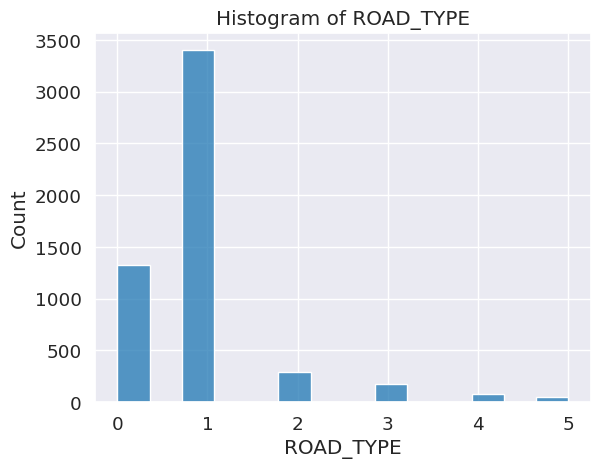

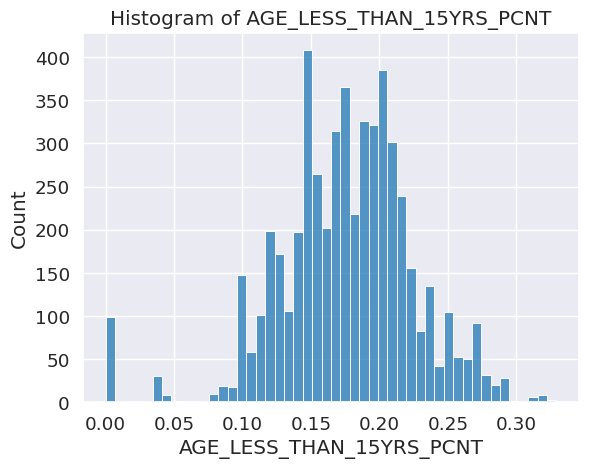

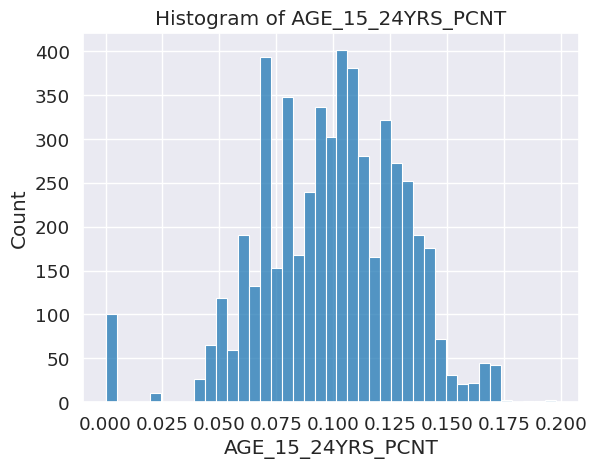

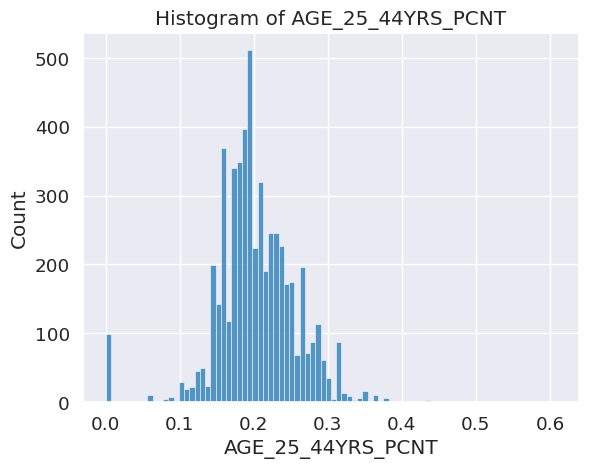

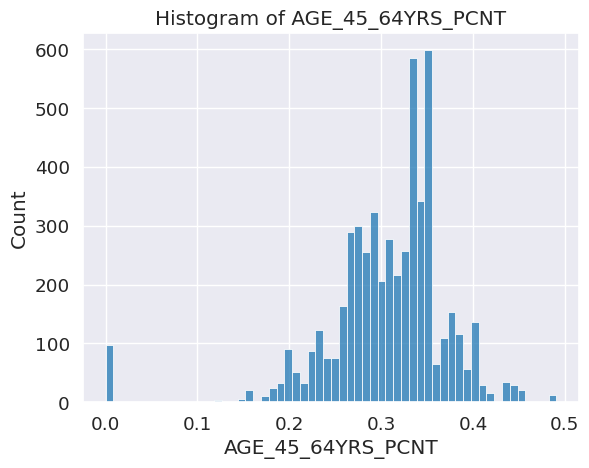

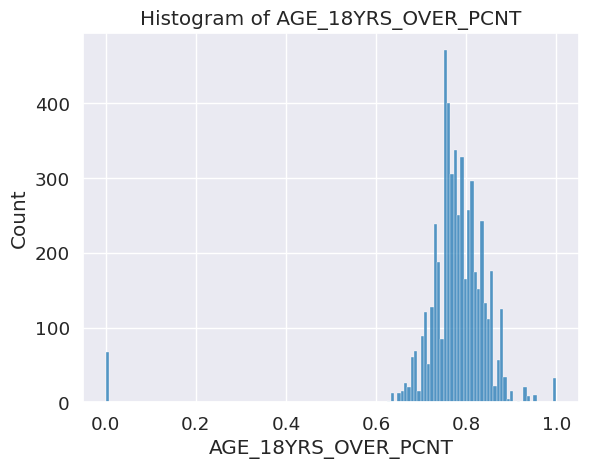

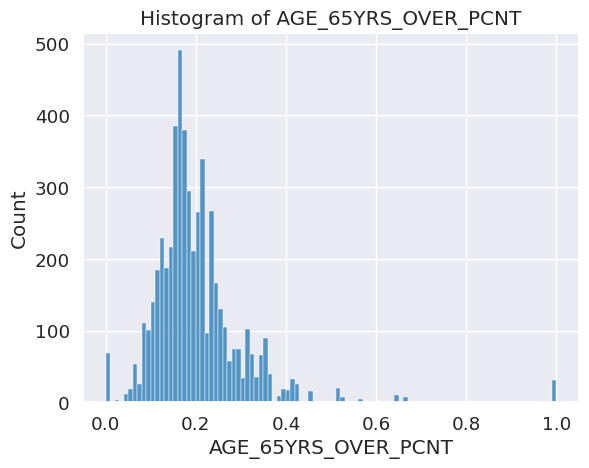

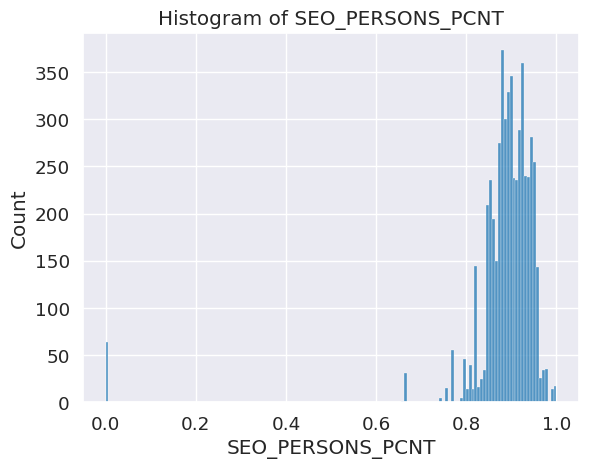

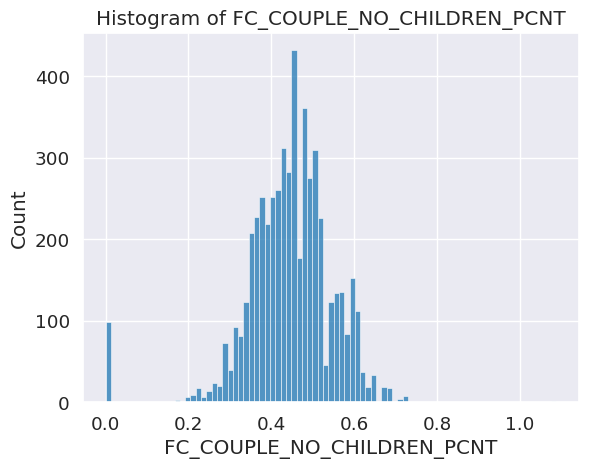

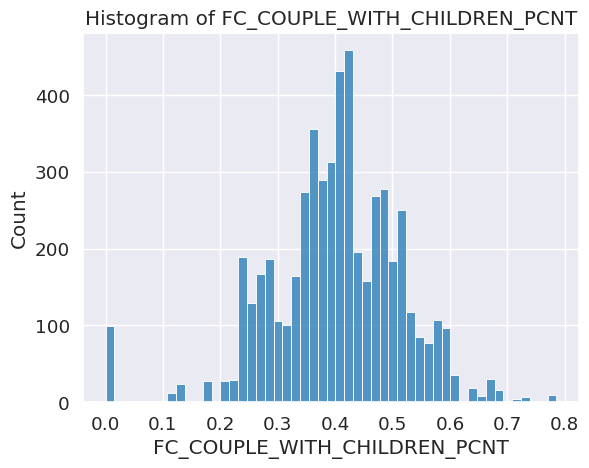

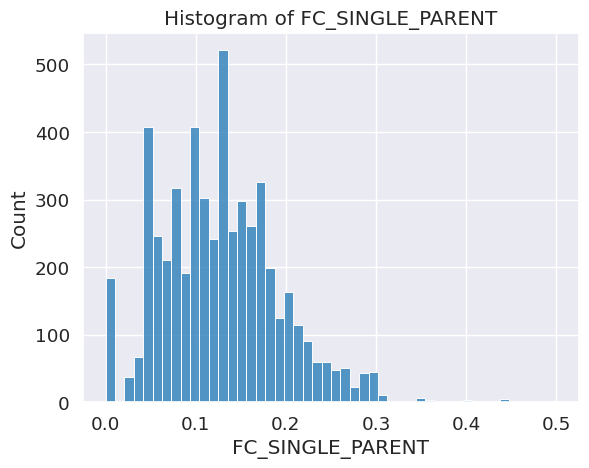

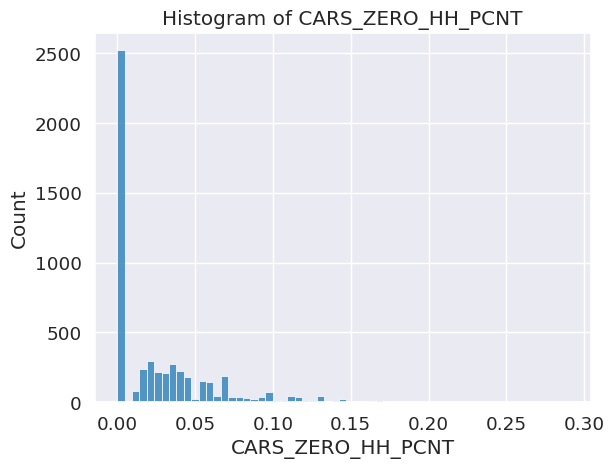

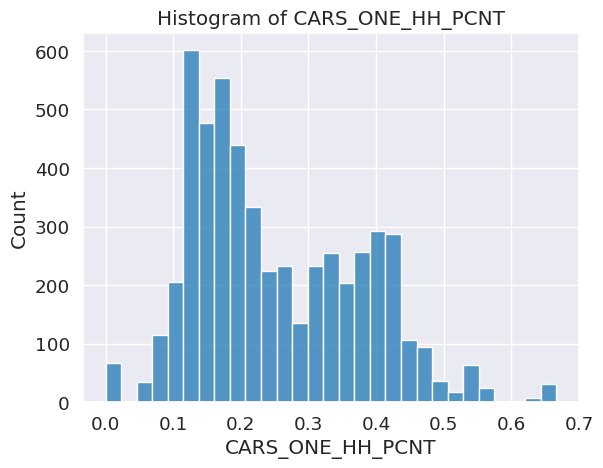

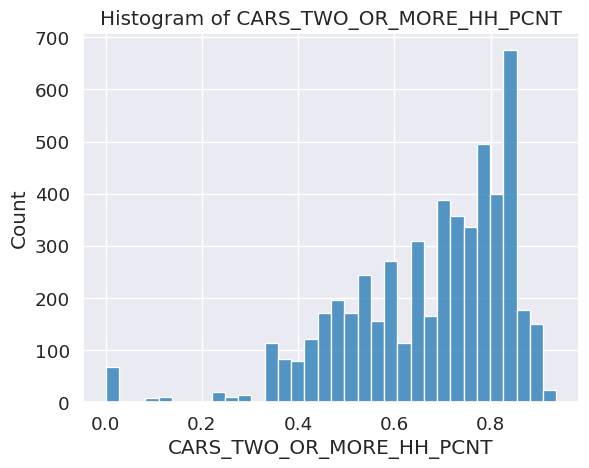

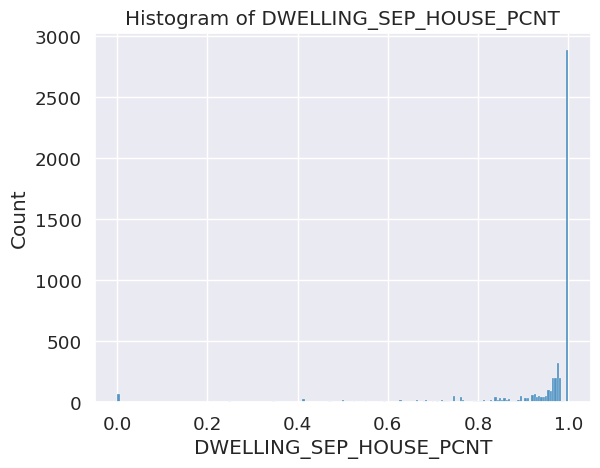

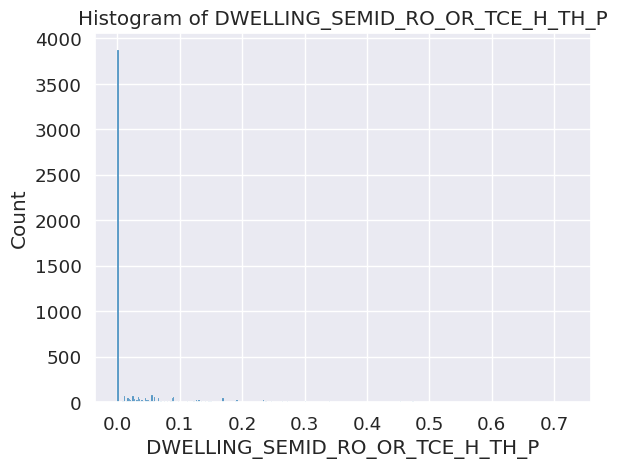

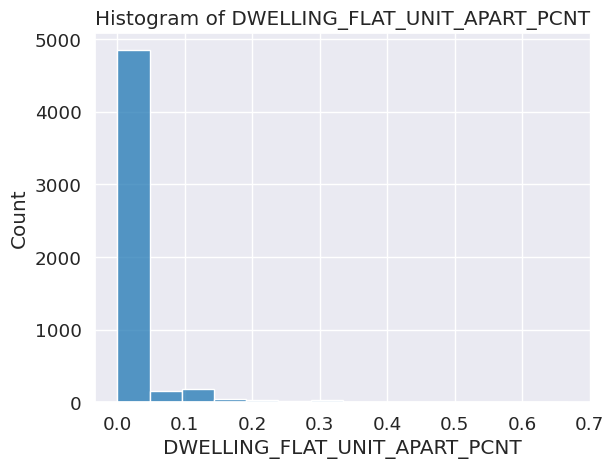

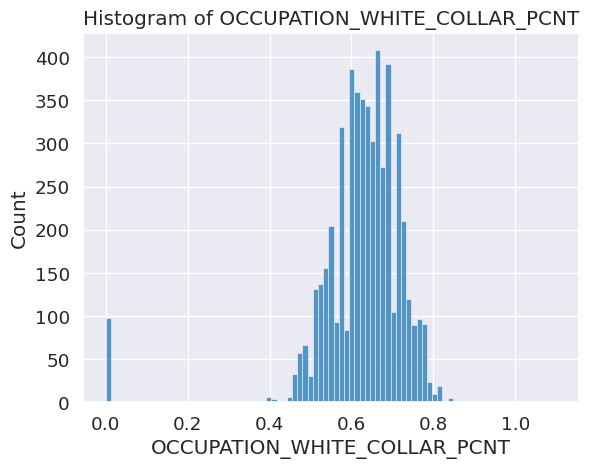

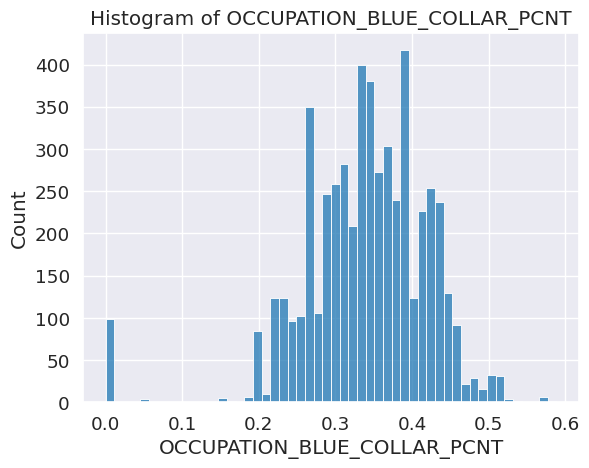

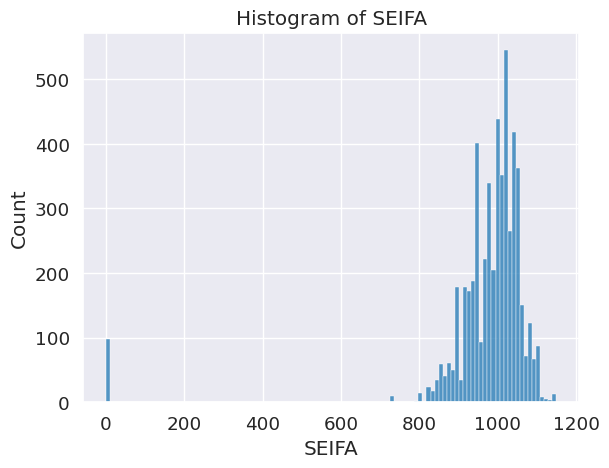

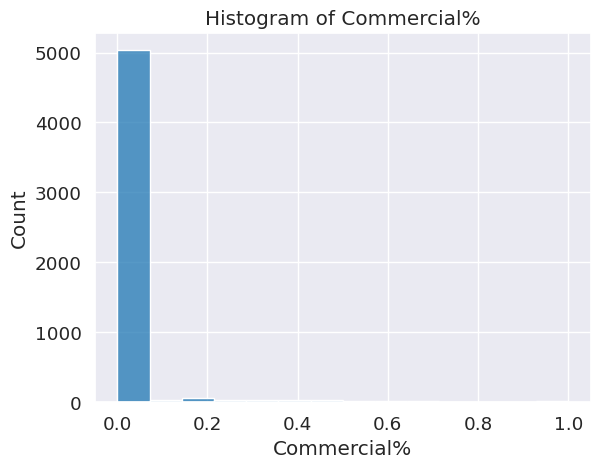

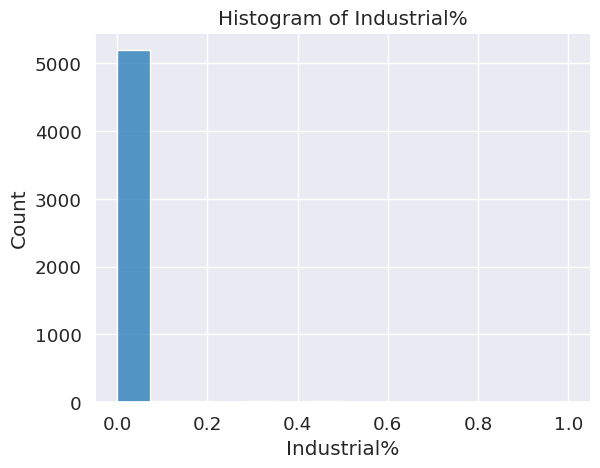

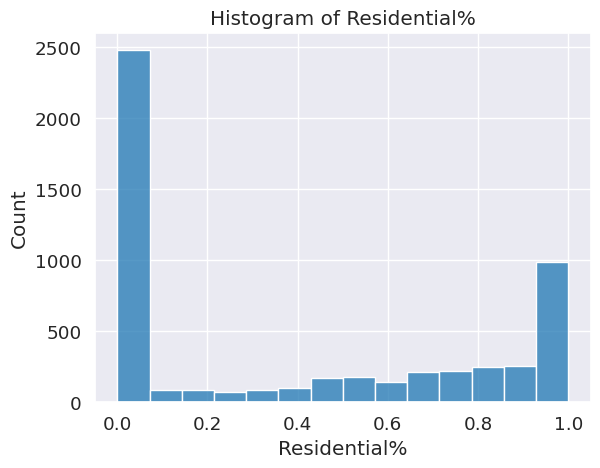

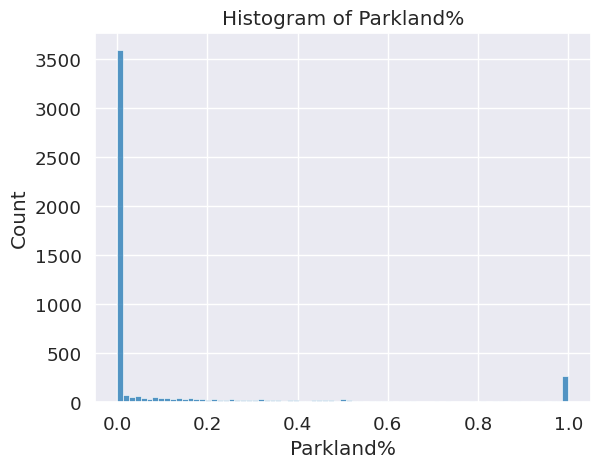

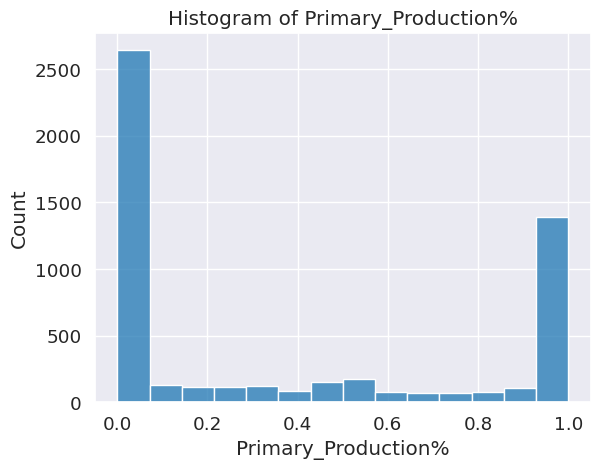

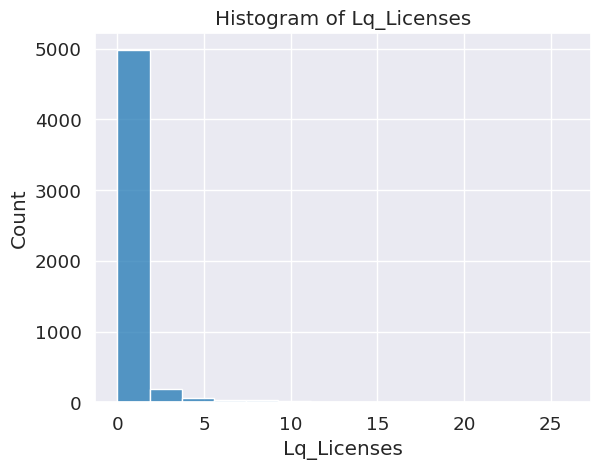

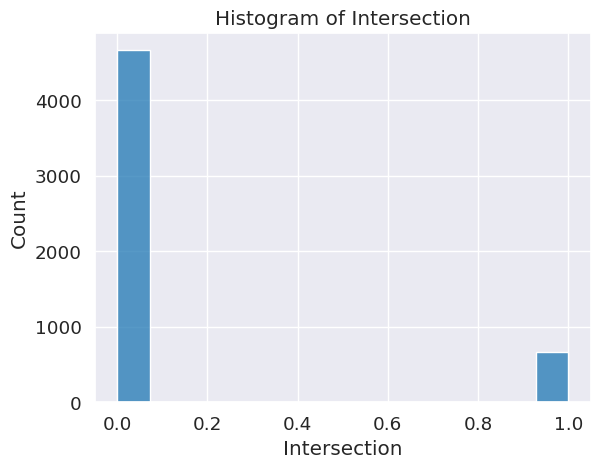

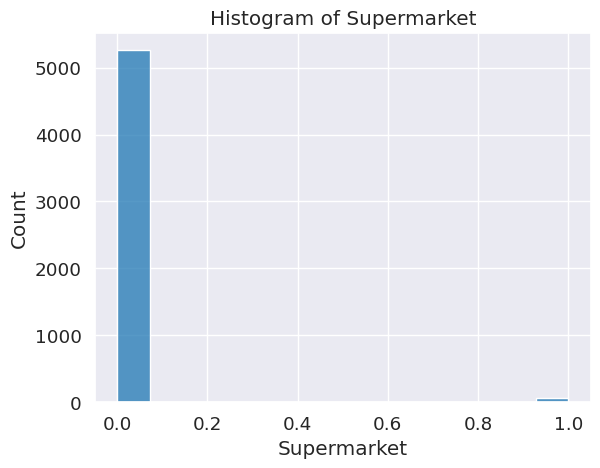

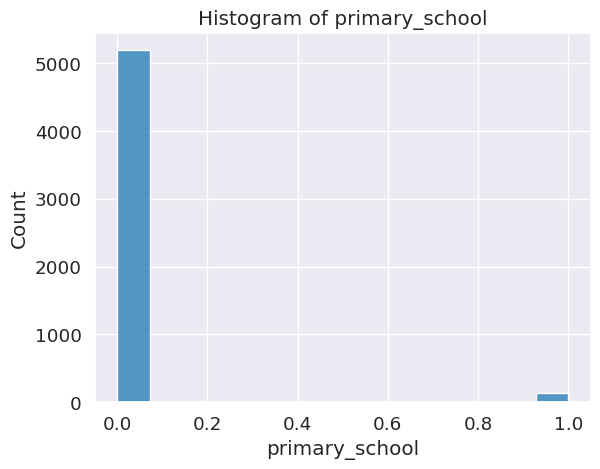

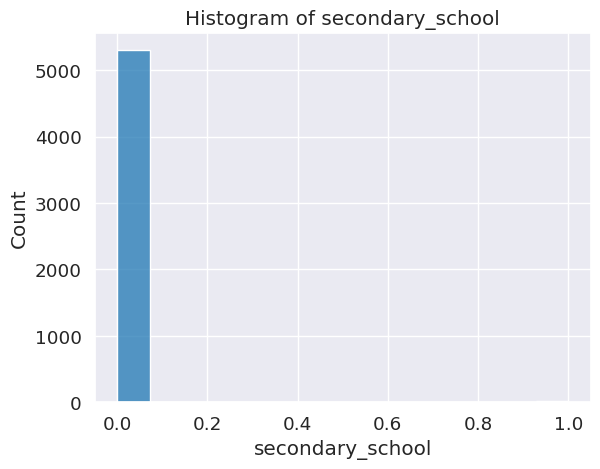

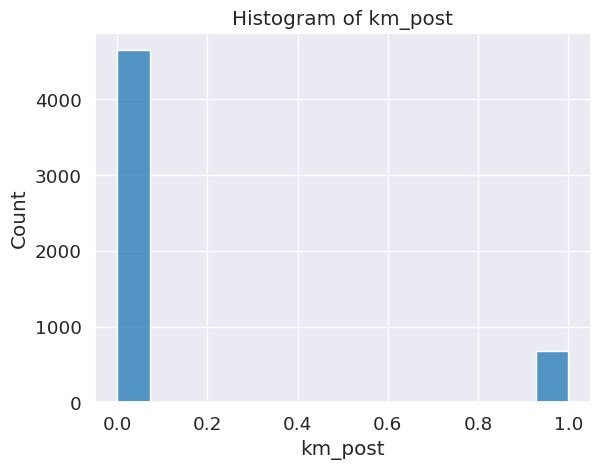

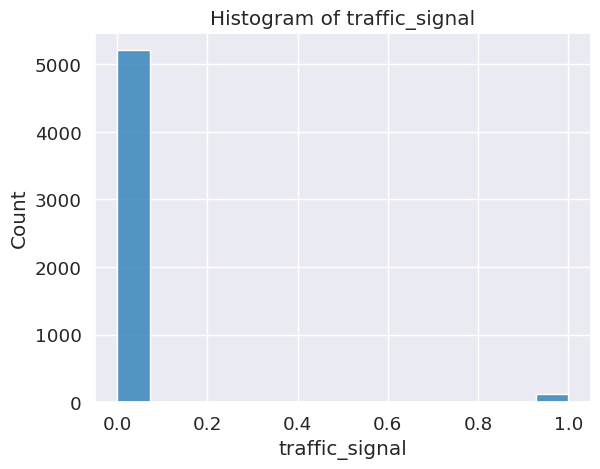

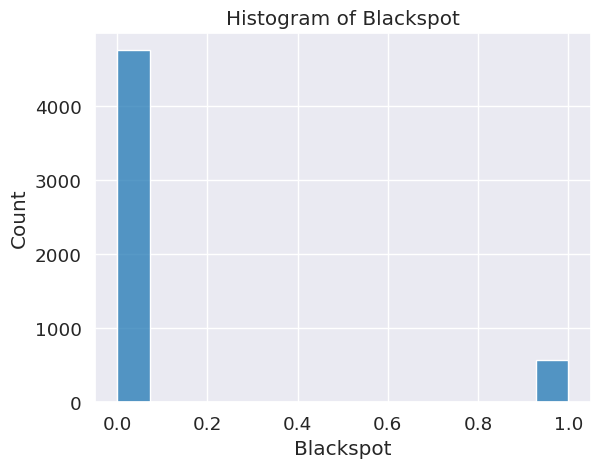

In [305]:
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html
# Get the numerical variables from the dataset
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Display histograms using seaborn
for variable in numerical_variables:
    sns.histplot(data=df, x=variable)
    plt.title(f"Histogram of {variable}")
    plt.show()


<Axes: xlabel='Lq_Licenses'>

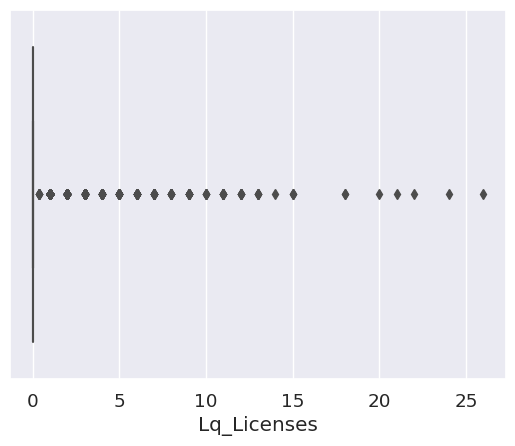

In [306]:
# Making Boxplot of Lq_Licenses
sns.boxplot(x=df['Lq_Licenses'], color='yellow')

<Axes: xlabel='Industrial%'>

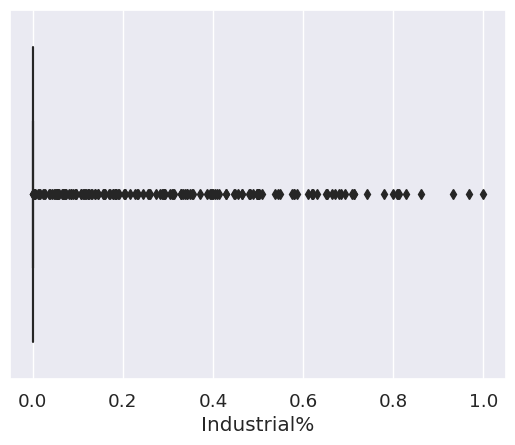

In [307]:
# Making Boxplot of Industrial%
sns.boxplot(x=df['Industrial%'], color='green')

###2.5.2 Bivariate Analysis

<Axes: xlabel='Blackspot', ylabel='count'>

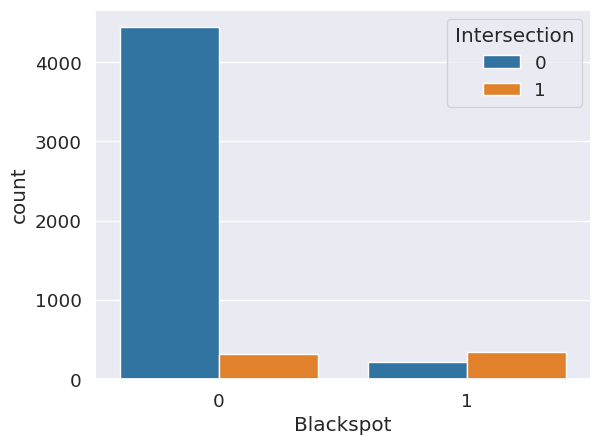

In [308]:
sns.countplot(data=df, x='Blackspot', hue='Intersection')

<Axes: xlabel='Blackspot', ylabel='count'>

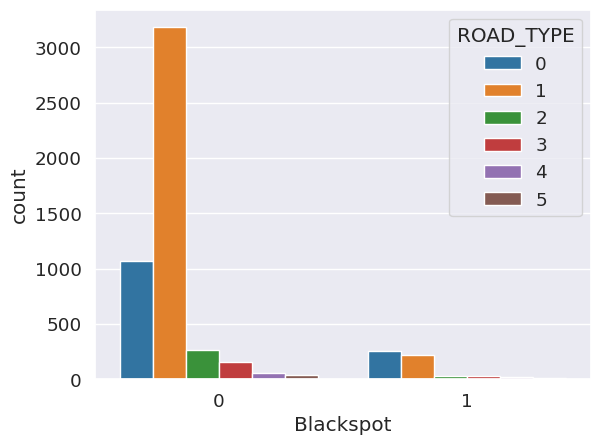

In [309]:
sns.countplot(data=df, x='Blackspot', hue='ROAD_TYPE')

<Axes: xlabel='Blackspot', ylabel='count'>

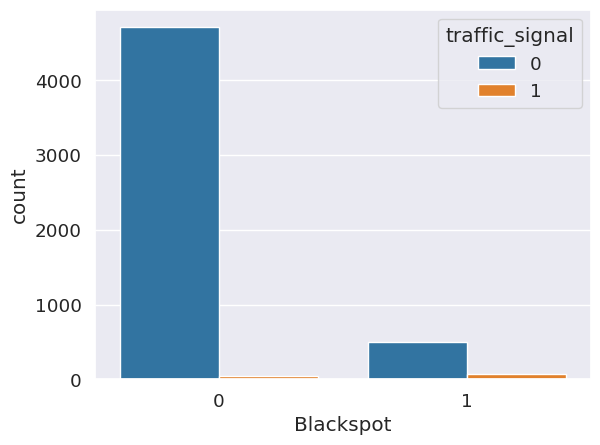

In [310]:
sns.countplot(data=df, x='Blackspot', hue='traffic_signal')

###Data Exploration

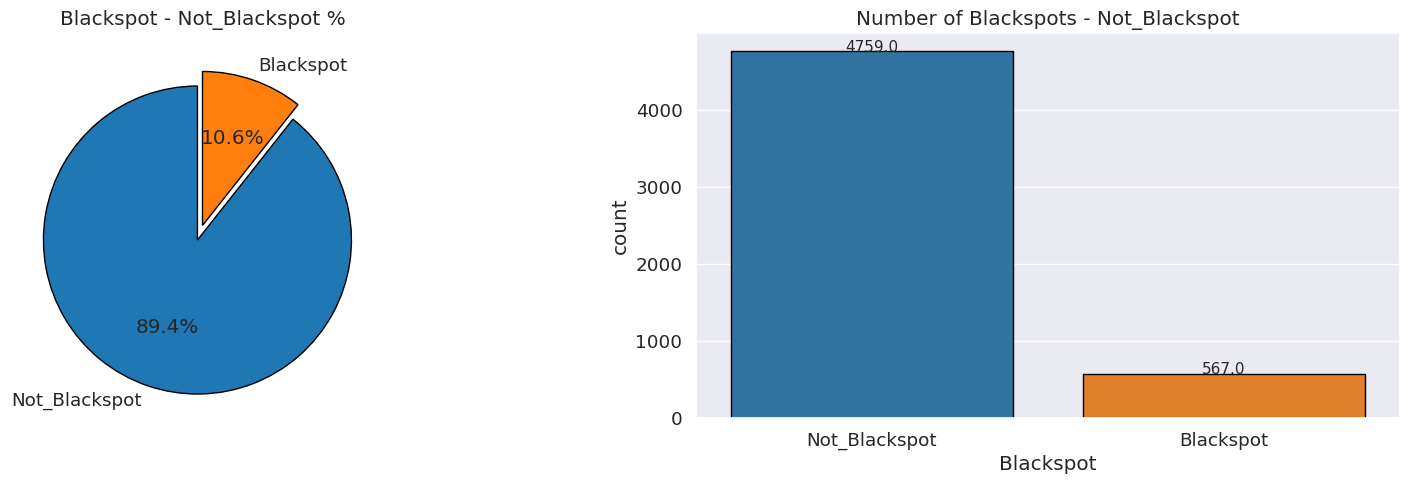

In [311]:
df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

blackspot = df1[df1['Blackspot'] == 1].describe().T
not_blackspot = df1[df1['Blackspot'] == 0].describe().T

l = list(df1['Blackspot'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not_Blackspot','Blackspot'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Blackspot - Not_Blackspot %');

plt.subplot(1,2,2)
ax = sns.countplot(x='Blackspot',data = df,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not_Blackspot','Blackspot'])

plt.title('Number of Blackspots - Not_Blackspot');
plt.show()

##2.5.3 Multivariate Analysis

In [312]:
selected_columns = df[['Commercial%','Supermarket','Industrial%','Lq_Licenses','Intersection','ROAD_TYPE','DWELLING_SEMID_RO_OR_TCE_H_TH_P','DWELLING_FLAT_UNIT_APART_PCNT','Blackspot']]

In [313]:
corr_matrix = selected_columns.corr()

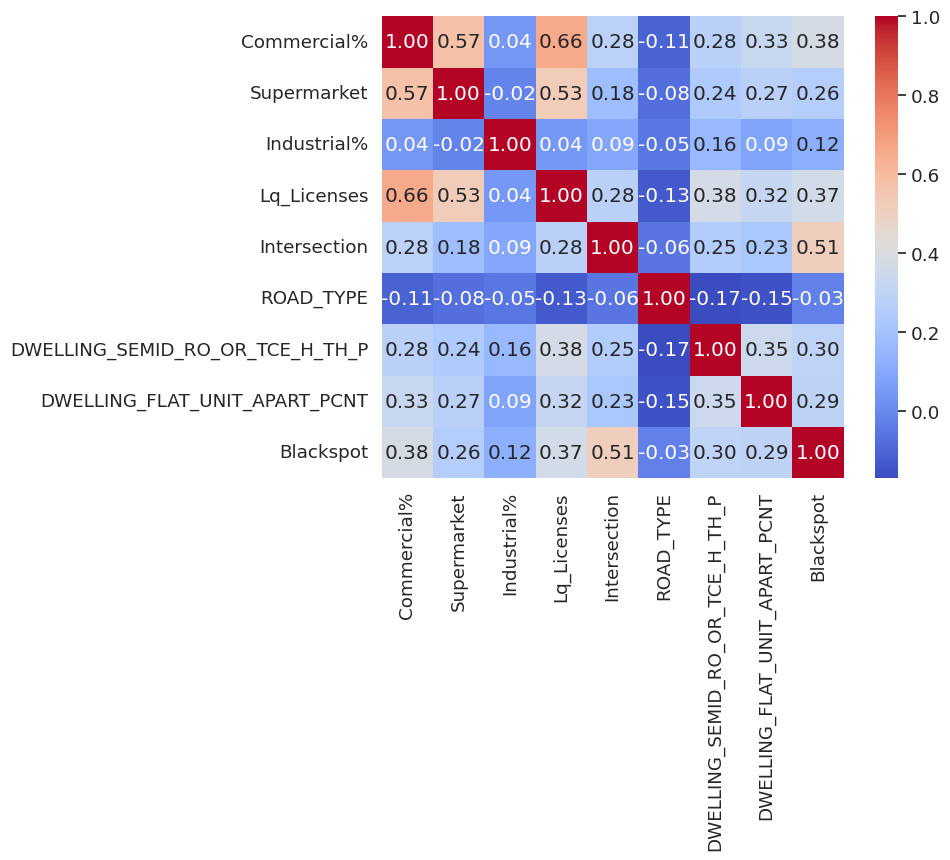

In [314]:
# Making heatmap of  selected_columns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm',fmt=".2f")
plt.show()

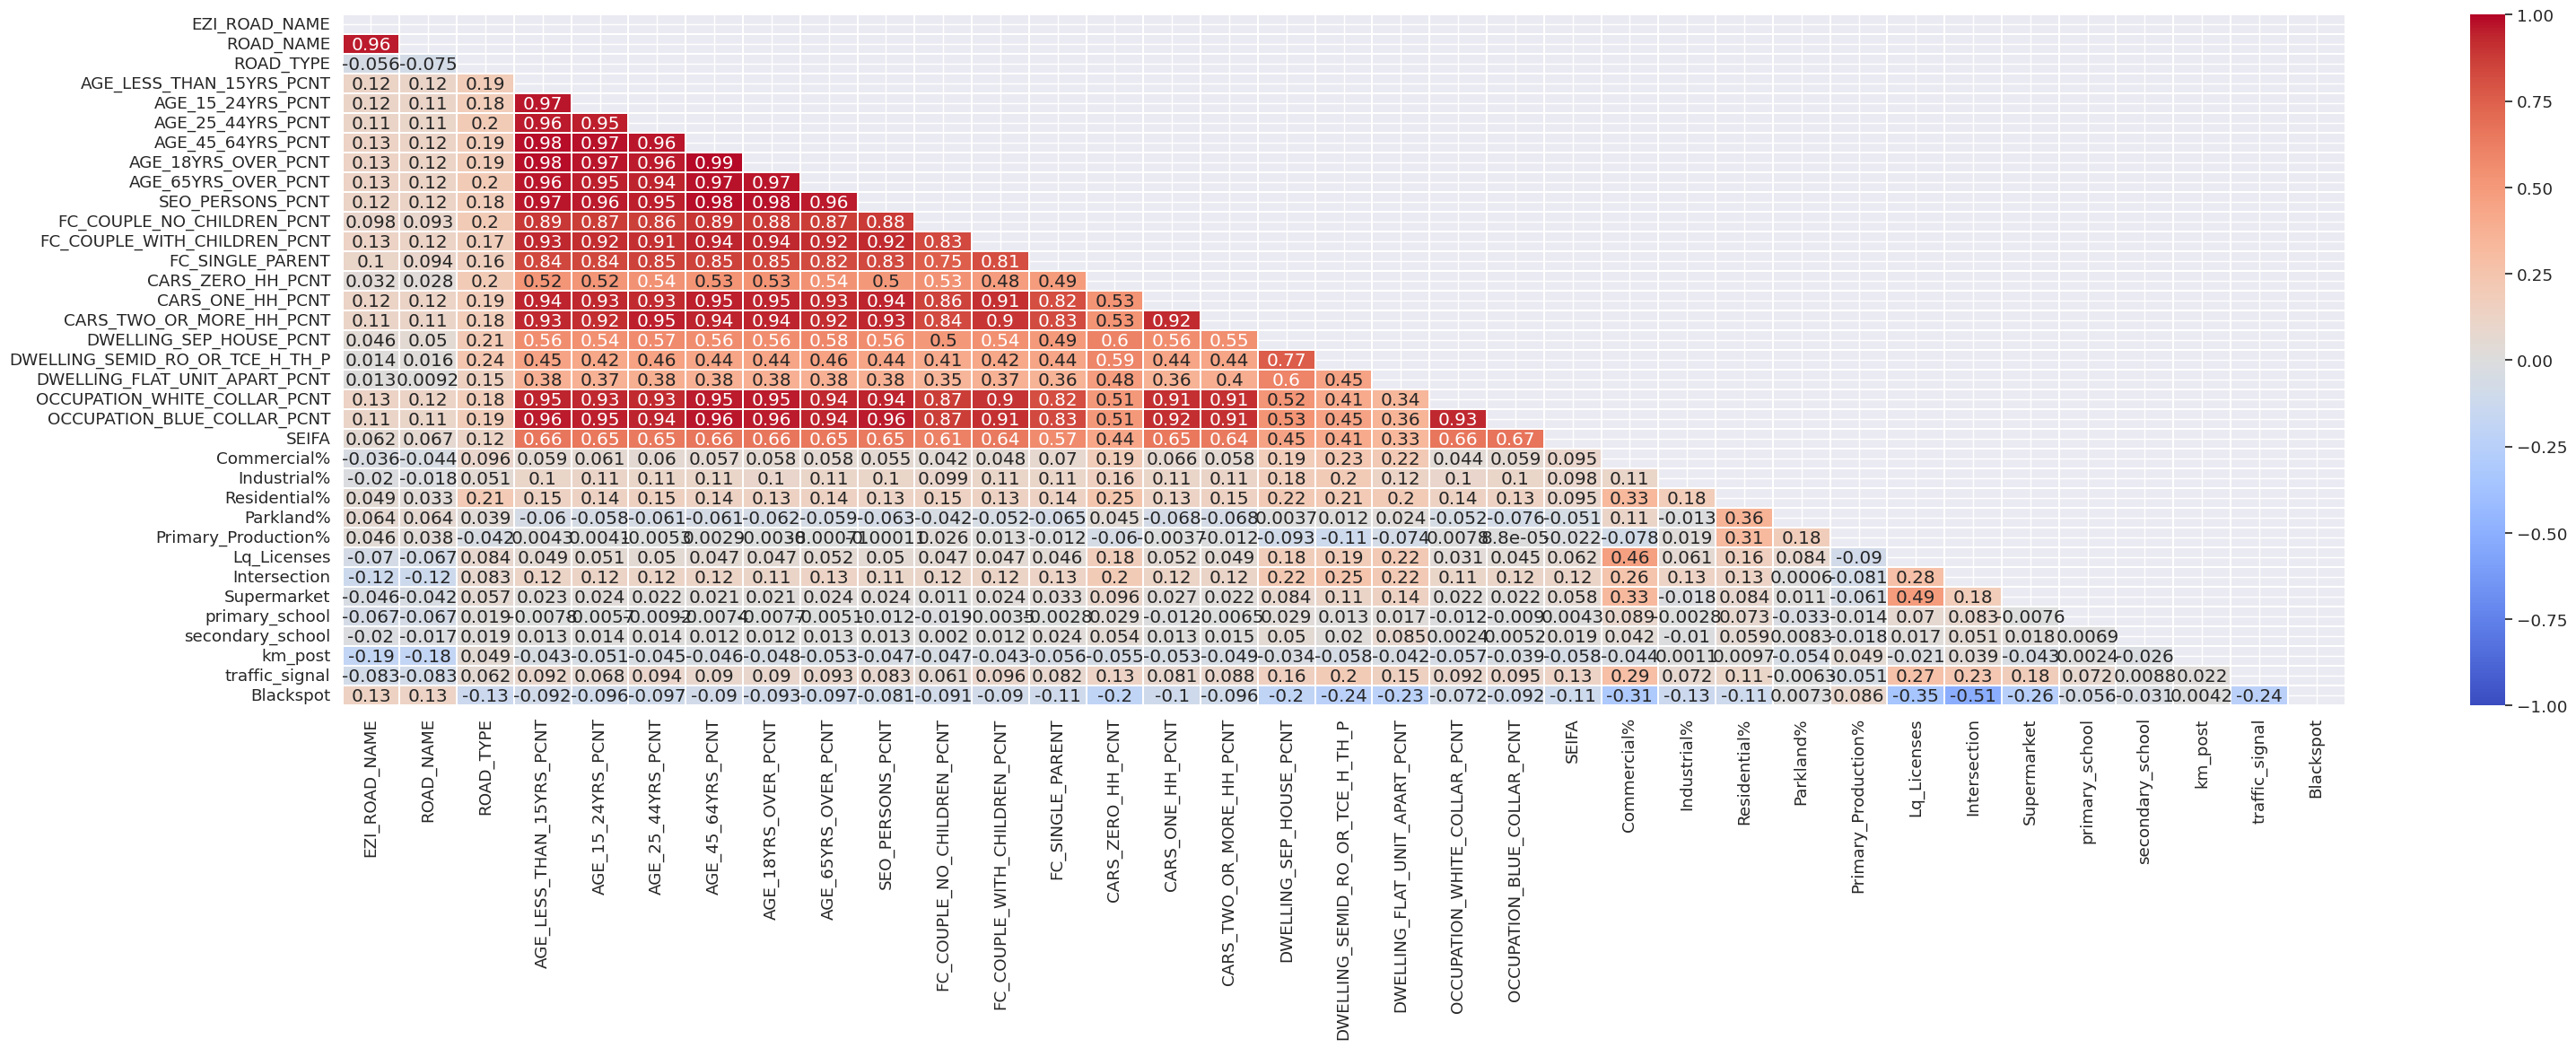

In [315]:
plt.figure(figsize=(36, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


<a id = "cell_modeling"></a>
#3. Machine learning model development

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in AI modeling.

_Use this section to show and discuss the process/processes as relevant to the case study, key steps to run and complete the experiment and details of models._  

This section may include:
* How to split dataset.
* How to initiate machine learning model and fit training data.
* How to use trained model to predict labels for training and testing dataset.

In [347]:
#Selecting predictors
features = ['Commercial%','Industrial%','Intersection','Lq_Licenses','ROAD_TYPE','AGE_15_24YRS_PCNT','Residential%','AGE_LESS_THAN_15YRS_PCNT']

X = df[features]
y = df.Blackspot

##3.1 Split the dataset

In [348]:
#Import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [350]:
#inspect the split datasets
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260 entries, 593 to 5157
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Commercial%               4260 non-null   float64
 1   Industrial%               4260 non-null   float64
 2   Intersection              4260 non-null   int64  
 3   Lq_Licenses               4260 non-null   float64
 4   ROAD_TYPE                 4260 non-null   int64  
 5   AGE_15_24YRS_PCNT         4260 non-null   float64
 6   Residential%              4260 non-null   float64
 7   AGE_LESS_THAN_15YRS_PCNT  4260 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 299.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 4817 to 2027
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Commercial%               1066 non-null   float64
 1   Indust

##3.2 Train a Logistic Regression Model and Make predictions

In [351]:
#Create an initial Logistic Regression model
logreg = LogisticRegression(max_iter=100)


In [352]:
# Complete the code to train Logistic Regression Classifer with the traning dataset
logreg = logreg.fit(X_train, y_train)

In [353]:
#Complete the code to make predictions for the test dataset
y_pred = logreg.predict(X_test)

In [354]:
import statsmodels.api as sm
# Add a constant column to X for the intercept term needed by statsmodels
X_train = sm.add_constant(X_train)
# Fit a logistic regression model using statsmodel
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
# Get the summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.224146
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Blackspot   No. Observations:                 4260
Model:                          Logit   Df Residuals:                     4251
Method:                           MLE   Df Model:                            8
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.3451
Time:                        07:25:48   Log-Likelihood:                -954.86
converged:                       True   LL-Null:                       -1458.1
Covariance Type:            nonrobust   LLR p-value:                6.071e-212
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.2978      0.283    -11.668      0.000      -3.852

<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in model execution and evaluation.

_Use this section to report your evaluation procedures and results.  Discuss/interpret the results of your experiments, discuss/compare the performance of the model(s), any steps you have taken to improve the performance of your model(s)._


##4.1 Evaluate Model Performance

In [355]:
#call metrics functions: Accuracy, Precision, Recall, F1 using the parameters y_test and y_pred
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))


Accuracy:  0.9221388367729831
Precision:  0.6818181818181818
Recall:  0.4205607476635514
F1:  0.5202312138728323


###Inspect Prediction

In [358]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.head(50)


,Commercial%,Industrial%,Intersection,Lq_Licenses,ROAD_TYPE,AGE_15_24YRS_PCNT,Residential%,AGE_LESS_THAN_15YRS_PCNT,Actual,Predicted
4817,0.000000,0.000000,0,0.0,2,0.083333,1.000000,0.271825,0,0
1039,0.000000,0.000000,0,0.0,1,0.124464,0.000000,0.163090,0,0
4700,0.000000,0.000000,0,0.0,1,0.124454,0.000000,0.141921,0,0
3194,0.000000,0.000000,0,0.0,1,0.102236,0.000000,0.185304,0,0
440,0.000000,0.000000,1,0.0,0,0.133333,1.000000,0.218519,0,0
1034,0.000000,0.000000,0,0.0,1,0.130919,0.000000,0.144847,0,0
4166,0.000000,0.000000,0,0.0,1,0.101449,0.989214,0.206522,0,0
3546,0.000000,0.000000,0,0.0,1,0.102190,0.000000,0.126521,0,0
4365,0.177746,0.000000,1,9.0,0,0.058735,0.564048,0.121988,0,1
1774,0.000000,0.000000,0,0.0,1,0.080891,0.799413,0.218054,0,0


In [326]:
#print confusion matrix and evaluation report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[935  24]
 [ 64  43]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       959
           1       0.64      0.40      0.49       107

    accuracy                           0.92      1066
   macro avg       0.79      0.69      0.72      1066
weighted avg       0.91      0.92      0.91      1066



###Plot ROC curve and confusion matrix

In [327]:
# First get the probabilities of the classes on the test set
probabilities = logreg.predict_proba(X_test)

In [328]:
#Now get the probabilities for the positive class
y_prob = probabilities[:, 1]

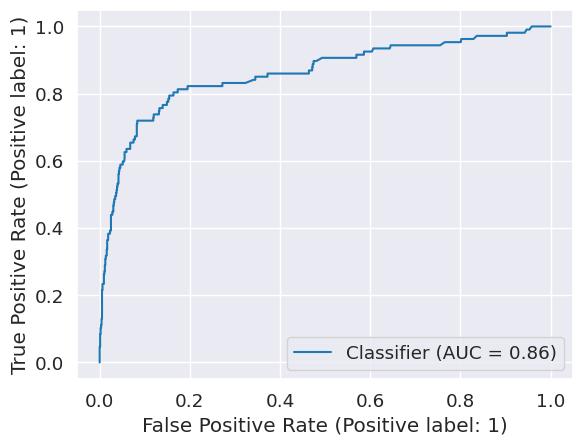

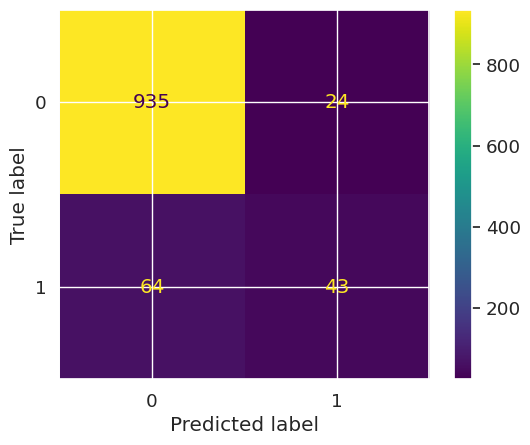

In [329]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
#complete the code to display RocCurve and Confusion Matrix
RocCurveDisplay.from_predictions(y_test, y_prob)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

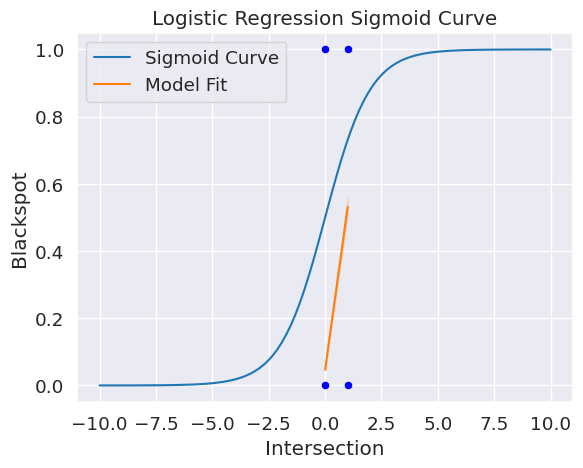

In [330]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a sequence of points along the x axis
x_vals = np.linspace(-10, 10, 100)

# Calculate the corresponding y values using the model coefficients
coef = logreg.coef_.flatten()
intercept = logreg.intercept_
y_vals = sigmoid(np.dot(X_test, coef) + intercept)

# Plot the sigmoid curve using seaborn
sns.lineplot(x=x_vals, y=sigmoid(x_vals), label='Sigmoid Curve')

# Plot the model fit curve
sns.lineplot(x=X_test['Intersection'], y=y_vals, label='Model Fit')

# Set style and context
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.2)

# Scatter plot of actual data points
sns.scatterplot(x=X_test['Intersection'], y=y_test, color='blue')

# Labeling and title
plt.xlabel('Intersection')
plt.ylabel('Blackspot')
plt.title('Logistic Regression Sigmoid Curve')
plt.legend()

# Show the plot
plt.show()

Axes(0.125,0.11;0.775x0.77)


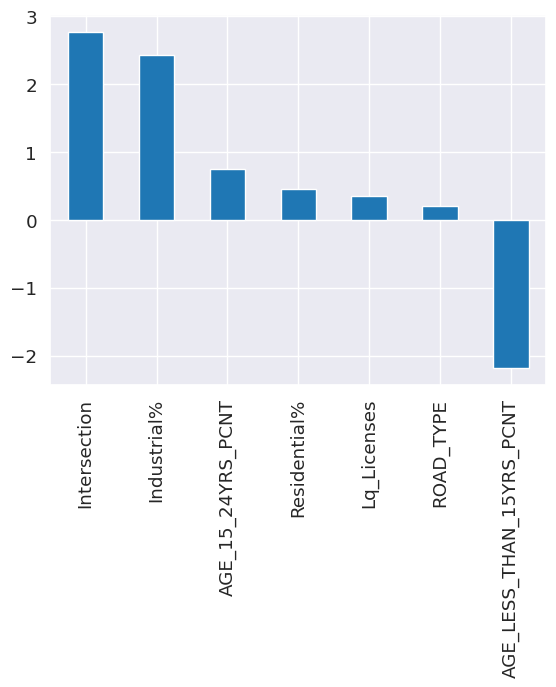

In [331]:
#Visualise the coefficients
coef = pd.Series(logreg.coef_[0], index=X.columns.values)
print (coef.sort_values(ascending = False).plot(kind='bar'))

In [332]:
#Print the model formula
print('Blackspot= ', '%.3f', '+', '%.3f' %coef[0], '*DWELLING_SEMID_RO_OR_TCE_H_TH_P', '+', '%.3f' %coef[1], '*Intersection', '+', '%.3f' %coef[2], '*Commercial%', '+', '%.3f' %coef[3], '*DWELLING_FLAT_UNIT_APART_PCNT', '+', '%.3f' %coef[4], '*Industrial%','+', '%.3f' %coef[4], '*Lq_Licenses')

Blackspot=  %.3f + 2.429 *DWELLING_SEMID_RO_OR_TCE_H_TH_P + 0.353 *Intersection + 2.769 *Commercial% + 0.199 *DWELLING_FLAT_UNIT_APART_PCNT + 0.747 *Industrial% + 0.747 *Lq_Licenses


## 5. Competition (optional)

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To (optionally) participate in the competetion.

_Use this section to report the deployment of the model on the unseen dataset. To ensure that the training and deployment datasets have similar features, it is important to preprocess the data in a consistent manner. This includes applying the same data preprocessing steps to both the training and deployment datasets. For example, if you are scaling the features in the training dataset, you should also scale the features in the deployment dataset using the same scaling method and parameters._

_Apply the trained model to predict the label for the deployment dataset and submit the result (inspection dataframe) as a csv file with you assessment._




In [333]:
import pandas as pd

In [334]:
#read the Blackspot_Competition.csv dataset

In [335]:
# Apply data transformation to the deployment data,
# ensure number of features and transformation of X and X_deploy are similar

# Apply trained model to X_deploy
# y_deploy = model(X_deploy)

#
# join unseen y_deploy with predicted value into a data frame
inspection = pd.DataFrame({'Predicted':y_deploy})

# join X_test with the new dataframe
inspection = pd.concat([X_deploy, inspection], axis=1)

# Submit this results.csv file to join the competition
inspection.to_csv('results.csv')

NameError: ignored